<a href="https://colab.research.google.com/github/kshitijain902/Machine_learning/blob/main/haberman__long_procedure_(correct)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/haber.csv')

In [ ]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
columns=['Age','Year_Of_Operation','Positive_Nodes','Status']

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/haber.csv',names=columns)

In [ ]:
df.head(3000)

,Age,Year_Of_Operation,Positive_Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
df.isnull().sum()

Age                  0
Year_Of_Operation    0
Positive_Nodes       0
Status               0
dtype: int64

In [ ]:
print(df.shape)

(306, 4)


In [ ]:
#df['Status'].value_counts()
df['Age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: Age, dtype: int64

In [ ]:

slices=df['Status'].value_counts()

([<matplotlib.patches.Wedge at 0x7f60aa623100>,
 [Text(-0.7410651721946901, 0.8129098415937984, 'Survived'),
  Text(0.74106517219469, -0.8129098415937984, 'Non_Survived')])

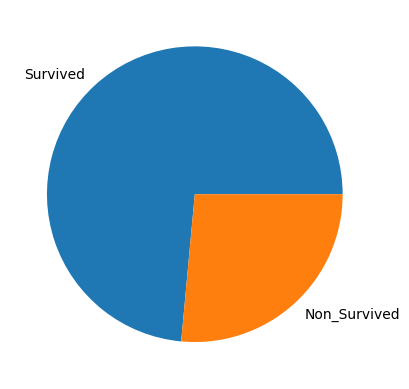

In [ ]:
plt.pie(x=slices,labels=['Survived','Non_Survived'])

In [ ]:
# Feature Age 

In [ ]:
print("Patient with lowest Age",df['Age'].min())

Patient with lowest Age 30


In [ ]:
# patients with highest age
print("Patients with highest age",df['Age'].max())

Patients with highest age 83


In [ ]:
print("Mean Age of the patient",df['Age'].mean())

Mean Age of the patient 52.45751633986928


In [ ]:
#df['Status'].value_counts()
df['Age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: Age, dtype: int64

([<matplotlib.axis.YTick at 0x7f60aa641670>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80')])

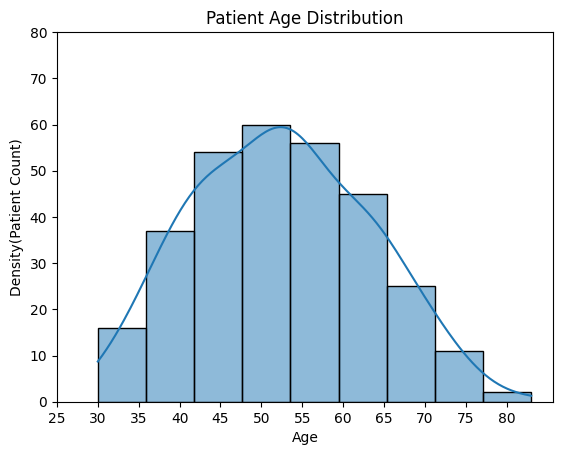

In [ ]:
sns.histplot(x=df['Age'],label='Age',bins=9,kde=True)
plt.xlabel('Age')
plt.ylabel("Density(Patient Count)")
plt.title('Patient Age Distribution')
plt.xticks(ticks=range(25,85,5))
plt.yticks(ticks=range(0,90,10)) # doubt when we use Age.value_counts it is showing max no as 13 but this graph is showing bigger values

In [ ]:
df['Status']=df['Status'].astype('int')
df=df.replace({'Status':{1:1,2:0}})
print(df['Status'].value_counts())

1    225
0     81
Name: Status, dtype: int64


In [ ]:
df

,Age,Year_Of_Operation,Positive_Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0


In [ ]:
df.shape

(306, 4)

In [ ]:
x=df.iloc[:,0:3].values
y=df.iloc[:,3:].values
print(x.shape)
print(y.shape)

(306, 3)
(306, 1)


In [ ]:
x_train=x[:250,]
x_test=x[250:,:]
y_train=y[:250,]
y_test=y[250:,]
print(x_test.shape)

(56, 3)


In [ ]:
u=np.mean(x,axis=0)
std=np.std(x,axis=0)

In [ ]:
x_train=(x_train-u)/std
x_test=(x_test-u)/std
a=np.mean(y,axis=0)
b=np.std(y,axis=0)
y_train=(y_train-a)/b
y_test=(y_test-a)/b

In [ ]:
print(x_train.std())

0.944671647134474


In [ ]:
def sigmoid(x):
  return 1.0/(1.0 +np.exp(-x))

In [ ]:
def hypothesis(x,theta):
  return sigmoid(np.dot(x,theta))

In [ ]:
def gradient(x,y,theta):
  h_theta=hypothesis(x,theta)
  grad=np.dot(x.T,(y-h_theta))
  return grad/x.shape[0]

In [ ]:
def cost_function(x,y,theta):
  h_theta=hypothesis(x,theta)
  cost=np.mean(y*np.log(h_theta)+(1-y)*np.log(1-h_theta))
  cost=cost*-1
  return cost

In [ ]:
def gradient_descent(x,y,learning_rate=0.01,max_steps=1000):
  m,n=x.shape 
  theta=np.zeros((n,1))
  cost_epoch=[]
  for i in range(max_steps):
    grad=gradient(x,y,theta)
    e=cost_function(x,y,theta)
    cost_epoch.append(e)
    theta=theta+learning_rate*grad
  return (theta,cost_epoch)

In [ ]:
ones=np.ones((x_train.shape[0],1))
x_train=np.hstack((ones,x_train))
y_train=y_train.reshape((-1,1))

In [ ]:
theta,cost_epoch=gradient_descent(x_train,y_train)

In [ ]:
theta

array([[-1.54630251],
       [ 0.11770585],
       [-0.16050239],
       [-1.22907712]])

In [ ]:
cost_epoch

[0.6931471805599454,
 0.6895013374555483,
 0.6858758910748802,
 0.6822707208358245,
 0.6786857051653135,
 0.6751207215518289,
 0.6715756465980709,
 0.6680503560737034,
 0.6645447249680878,
 0.6610586275429161,
 0.6575919373846658,
 0.6541445274567897,
 0.6507162701515664,
 0.6473070373415337,
 0.6439167004304369,
 0.6405451304036197,
 0.6371921978777961,
 0.6338577731501411,
 0.6305417262466413,
 0.6272439269696551,
 0.6239642449446298,
 0.6207025496659299,
 0.6174587105417361,
 0.6142325969379738,
 0.6110240782212397,
 0.6078330238006906,
 0.6046593031688728,
 0.6015027859414634,
 0.5983633418959043,
 0.5952408410089141,
 0.5921351534928592,
 0.5890461498309794,
 0.5859737008114537,
 0.5829176775603062,
 0.5798779515731483,
 0.5768543947457565,
 0.5738468794034901,
 0.5708552783295532,
 0.5678794647921082,
 0.5649193125702513,
 0.5619746959788595,
 0.559045489892322,
 0.5561315697671735,
 0.5532328116636416,
 0.5503490922661278,
 0.5474802889026417,
 0.544626279563204,
 0.541786942917

In [ ]:
ones=np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))
y_test=y_test.reshape((-1,1))

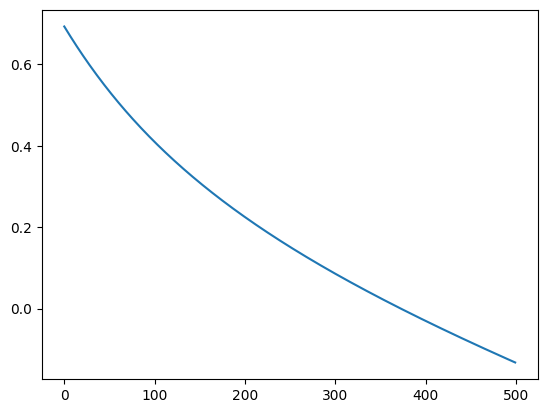

In [ ]:
plt.plot(cost_epoch)

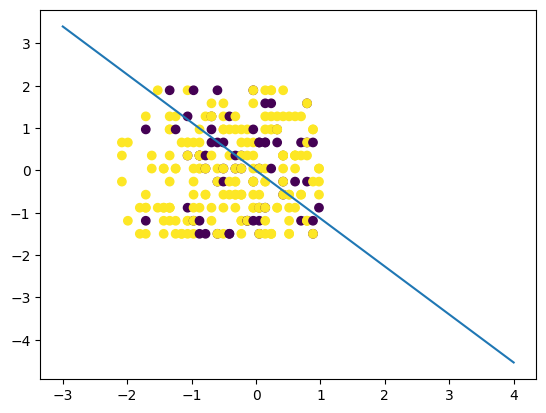

In [ ]:
x1 = np.arange(-3, 5)

x2 = -(theta[0] * theta[1]*x1)/theta[2]

plt.scatter(x_train[:, 1], x_train[:, 2], c = y_train)
plt.plot(x1, x2)

In [ ]:
def predict(X, theta):
    h_theta = hypothesis(X, theta)
    output = np.zeros(h_theta.shape)

    output[h_theta>0.5] = 1
    output = output.astype('int')

    return output
     

In [ ]:
train_preds = predict(x_train, theta)
test_preds = predict(x_test, theta)

In [ ]:
for i in range(len(test_preds)):
    print(test_preds[i], y_test[i])

[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [-1.66666667]
[0] [-1.66666667]
[0] [-1.66666667]
[0] [-1.66666667]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [-1.66666667]
[0] [-1.66666667]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [-1.66666667]
[0] [-1.66666667]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [-1.66666667]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [-1.66666667]
[0] [-1.66666667]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [-1.66666667]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [-1.66666667]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [0.6]
[0] [-1.66666667]
[0] [-1.66666667]


In [ ]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])

In [ ]:
accuracy(train_preds,y_train)

0.736


In [ ]:

accuracy(test_preds, y_test)

0.7321428571428571
